In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import _pickle as pickle
import seaborn as sns
import pymysql

In [2]:
visit_probability = {}
for visit_id, prob in np.array(pd.read_csv('../data/rfr_model_depth_69_trees_190_preds.csv', header=None)):
    visit_probability[int(visit_id)] = prob
    
len(visit_probability)

1573113

In [3]:
top_important_features = pd.read_csv('../tables/table_2_20_feature_importance.csv')

In [4]:
negative_training = pickle.load(open('../data/negative_training_set.p', 'rb'))
positive_training = pickle.load(open('../data/positive_training_set.p', 'rb'))
negative_eval = pickle.load(open('../data/negative_eval_set.p', 'rb'))
positive_eval = pickle.load(open('../data/positive_eval_set.p', 'rb'))
len(negative_training), len(positive_training), len(negative_eval), len(positive_eval)

(4670, 4670, 4670, 4670)

In [5]:
colors = sns.color_palette("colorblind", 5).as_hex()

In [6]:
training_probs = pd.DataFrame([['non-COVID-19 training set', visit_probability[i]] for i in negative_training] +
                              [['COVID-19 training set', visit_probability[i]] for i in positive_training], 
                              columns=['set', 'prob'])
eval_probs = pd.DataFrame([['non-COVID-19 evaluation set', visit_probability[i]] for i in negative_eval] +
                              [['COVID-19 evaluation set', visit_probability[i]] for i in positive_eval], 
                              columns=['set', 'prob'])
len(training_probs), len(eval_probs)

(9340, 9340)

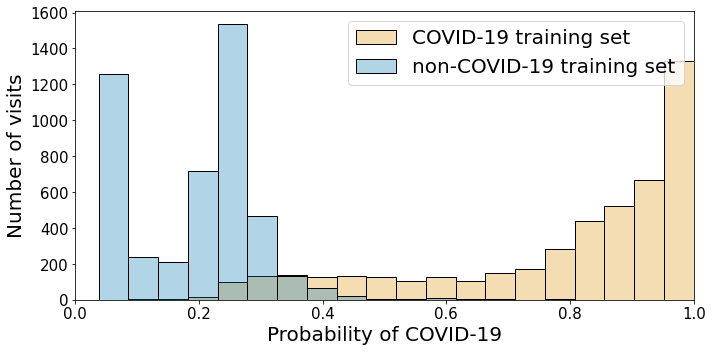

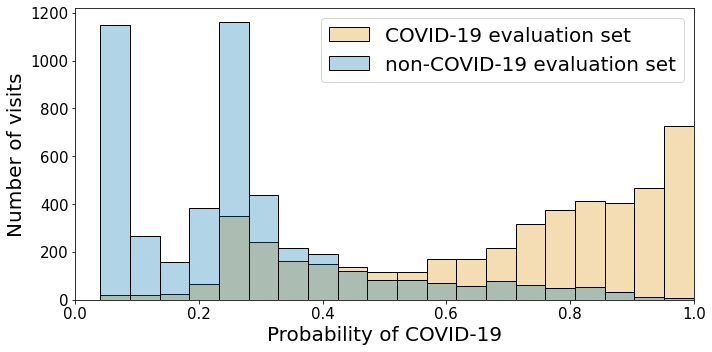

In [7]:
plt.figure(figsize=(10, 5))
sns.histplot(data=training_probs, x='prob', bins=20,  hue='set', palette=colors[:2],
             alpha=0.3, legend=False)

plt.xlim(0,1)
plt.legend(title = '', labels = ['COVID-19 training set','non-COVID-19 training set'], prop={'size': 20})
plt.ylabel('Number of visits', size=20)
plt.xlabel('Probability of COVID-19', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.tight_layout()
plt.savefig('figure_3_a_training_set.pdf')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(data=eval_probs, x='prob', bins=20,  hue='set',  palette=colors[:2],
             alpha=0.3, legend=False)

plt.xlim(0,1)
plt.legend(title = '', labels = ['COVID-19 evaluation set','non-COVID-19 evaluation set'], prop={'size': 20})
plt.ylabel('Number of visits', size=20)
plt.xlabel('Probability of COVID-19', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.tight_layout()
plt.savefig('figure_3_a_eval_set.pdf')
plt.show()



In [8]:
demographics_matrix = pickle.load(open('../data/demographic_matrix.p', 'rb'))
demographics_variables = pickle.load(open('../data/demographic_variables.p', 'rb'))
diag_matrix = pickle.load(open('../data/diag_matrix.p', 'rb'))
diag_variables = pickle.load(open('../data/diag_variables.p', 'rb'))
datetime_matrix = pickle.load(open('../data/datetime_matrix.p', 'rb'))
datetime_variables = pickle.load(open('../data/datetime_variables.p', 'rb'))

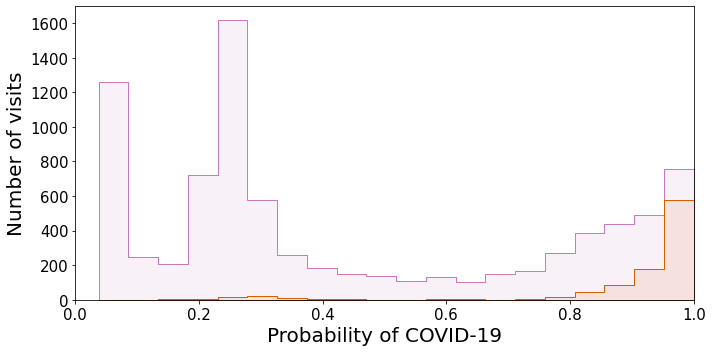

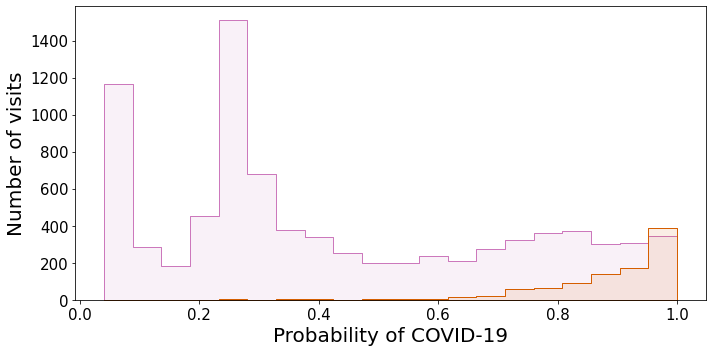

In [23]:
data_plot_training = pd.DataFrame([['training_cases', visit_probability[i]] 
                          for i in negative_training+positive_training if diag_matrix[i][diag_variables.index('R06')]==1] +
                         [['training_non_cases', visit_probability[i]] 
                          for i in negative_training+positive_training if diag_matrix[i][diag_variables.index('R06')]==0] , 
                         columns=['set', 'prob'])

data_plot_eval = pd.DataFrame([['eval_cases', visit_probability[i]] 
                          for i in negative_eval+positive_eval if diag_matrix[i][diag_variables.index('R06')]==1] +
                         [['eval_non_cases', visit_probability[i]] 
                          for i in negative_eval+positive_eval if diag_matrix[i][diag_variables.index('R06')]==0] , 
                         columns=['set', 'prob'])                         


plt.figure(figsize=(10, 5))
sns.histplot(data=data_plot_training, x='prob', bins=20,  hue='set', palette=colors[3:], legend=False,
             alpha=0.1, element='step')

plt.xlim(0,1)
plt.ylabel('Number of visits', size=20)
plt.xlabel('Probability of COVID-19', size=20) 
plt.xticks(size=15)
plt.yticks(size=15)
plt.tight_layout()
plt.savefig('figure_3_b_training_set_r06.pdf')
plt.show()


plt.figure(figsize=(10, 5))
sns.histplot(data=data_plot_eval, x='prob', bins=20,  hue='set', palette=colors[3:], legend=False,
             alpha=0.1, element='step')

plt.ylabel('Number of visits', size=20)
plt.xlabel('Probability of COVID-19', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.tight_layout()
plt.savefig('figure_3_b_eval_set_r06.pdf')
plt.show()



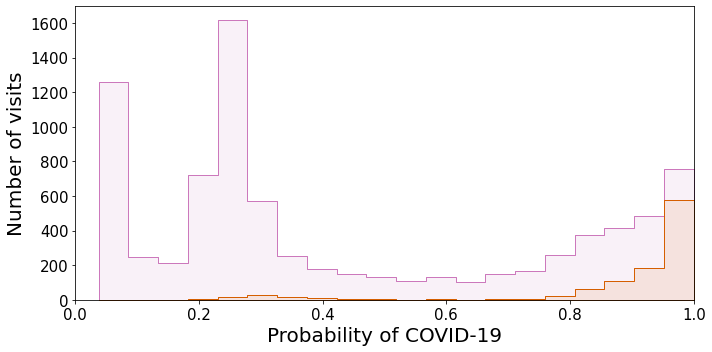

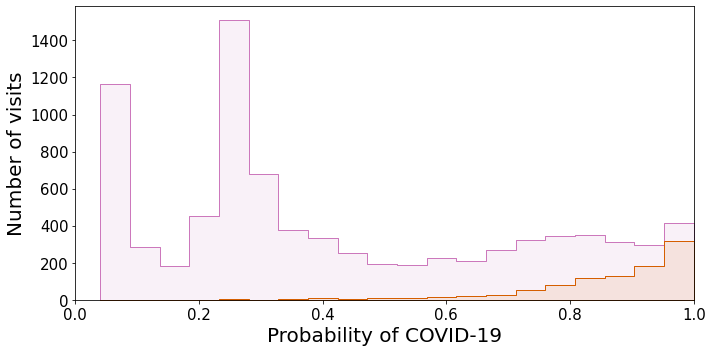

In [24]:
data_plot_training = pd.DataFrame([['training_cases', visit_probability[i]] 
                          for i in negative_training+positive_training if diag_matrix[i][diag_variables.index('R09')]==1] +
                         [['training_non_cases', visit_probability[i]] 
                          for i in negative_training+positive_training if diag_matrix[i][diag_variables.index('R09')]==0] , 
                         columns=['set', 'prob'])

data_plot_eval = pd.DataFrame([['eval_cases', visit_probability[i]] 
                          for i in negative_eval+positive_eval if diag_matrix[i][diag_variables.index('R09')]==1] +
                         [['eval_non_cases', visit_probability[i]] 
                          for i in negative_eval+positive_eval if diag_matrix[i][diag_variables.index('R09')]==0] , 
                         columns=['set', 'prob'])                         


plt.figure(figsize=(10, 5))
sns.histplot(data=data_plot_training, x='prob', bins=20,  hue='set', palette=colors[3:], legend=False,
             alpha=0.1, element='step')

plt.xlim(0,1)
plt.ylabel('Number of visits', size=20)
plt.xlabel('Probability of COVID-19', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.tight_layout()
plt.savefig('figure_3_c_training_set_r09.pdf')
plt.show()


plt.figure(figsize=(10, 5))
sns.histplot(data=data_plot_eval, x='prob', bins=20,  hue='set', palette=colors[3:], legend=False,
             alpha=0.1, element='step')

plt.xlim(0,1)
plt.ylabel('Number of visits', size=20)
plt.xlabel('Probability of COVID-19', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.tight_layout()
plt.savefig('figure_3_c_eval_set_r09.pdf')
plt.show()




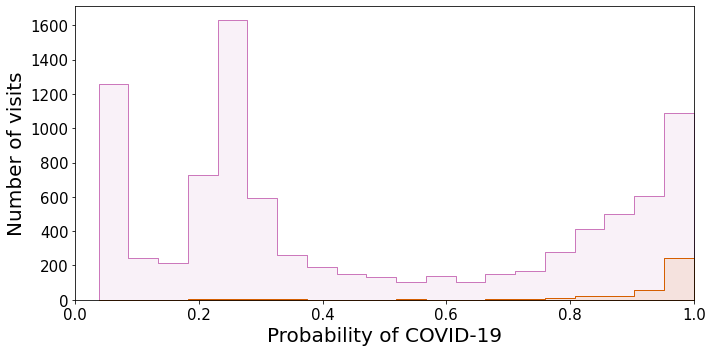

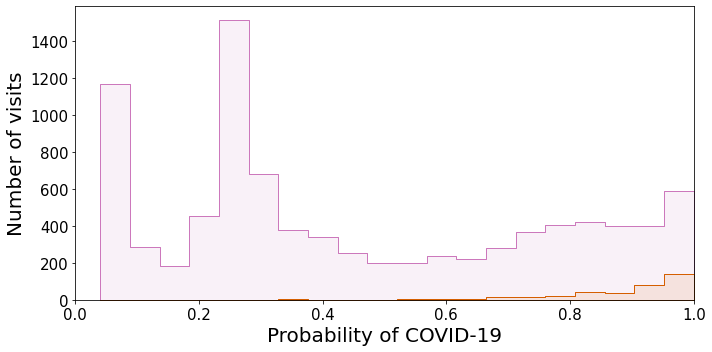

In [25]:
data_plot_training = pd.DataFrame([['training_cases', visit_probability[i]] 
                          for i in negative_training+positive_training if diag_matrix[i][diag_variables.index('R05')]==1] +
                         [['training_non_cases', visit_probability[i]] 
                          for i in negative_training+positive_training if diag_matrix[i][diag_variables.index('R05')]==0] , 
                         columns=['set', 'prob'])

data_plot_eval = pd.DataFrame([['eval_cases', visit_probability[i]] 
                          for i in negative_eval+positive_eval if diag_matrix[i][diag_variables.index('R05')]==1] +
                         [['eval_non_cases', visit_probability[i]] 
                          for i in negative_eval+positive_eval if diag_matrix[i][diag_variables.index('R05')]==0] , 
                         columns=['set', 'prob'])                         

plt.figure(figsize=(10, 5))
sns.histplot(data=data_plot_training, x='prob', bins=20,  hue='set', palette=colors[3:], legend=False,
             alpha=0.1, element='step')

plt.xlim(0,1)
plt.ylabel('Number of visits', size=20)
plt.xlabel('Probability of COVID-19', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.tight_layout()
plt.savefig('figure_3_d_training_set_r05.pdf')
plt.show()


plt.figure(figsize=(10, 5))
sns.histplot(data=data_plot_eval, x='prob', bins=20,  hue='set', palette=colors[3:], legend=False,
             alpha=0.1, element='step')

plt.xlim(0,1)
plt.ylabel('Number of visits', size=20)
plt.xlabel('Probability of COVID-19', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.tight_layout()
plt.savefig('figure_3_d_eval_set_r05.pdf')
plt.show()



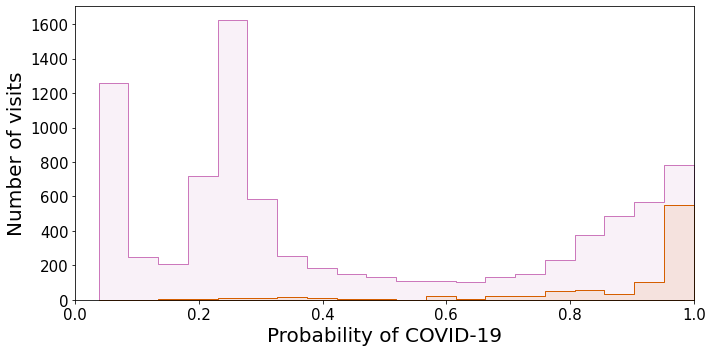

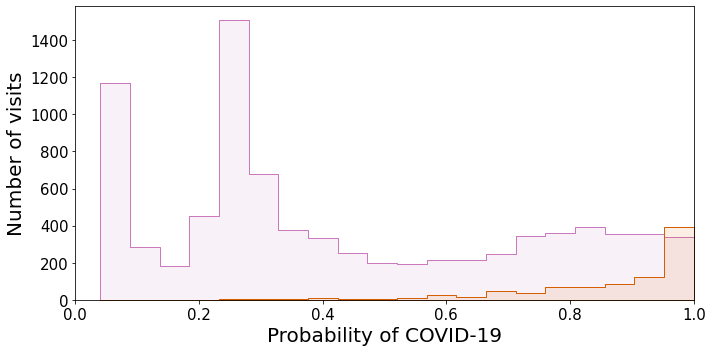

In [26]:
data_plot_training = pd.DataFrame([['training_cases', visit_probability[i]] 
                          for i in negative_training+positive_training if datetime_matrix[i][2]==1] +
                         [['training_non_cases', visit_probability[i]] 
                          for i in negative_training+positive_training if datetime_matrix[i][2]==0] , 
                         columns=['set', 'prob'])

data_plot_eval = pd.DataFrame([['eval_cases', visit_probability[i]] 
                          for i in negative_eval+positive_eval if datetime_matrix[i][2]==1] +
                         [['eval_non_cases', visit_probability[i]] 
                          for i in negative_eval+positive_eval if datetime_matrix[i][2]==0] , 
                         columns=['set', 'prob'])                         


plt.figure(figsize=(10, 5))
sns.histplot(data=data_plot_training, x='prob', bins=20,  hue='set', palette=colors[3:], legend=False,
             alpha=0.1, element='step')

plt.xlim(0,1)
plt.ylabel('Number of visits', size=20)
plt.xlabel('Probability of COVID-19', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.tight_layout()
plt.savefig('figure_3_e_training_set_april2020.pdf')
plt.show()


plt.figure(figsize=(10, 5))
sns.histplot(data=data_plot_eval, x='prob', bins=20,  hue='set', palette=colors[3:], legend=False,
             alpha=0.1, element='step')

plt.xlim(0,1)
plt.ylabel('Number of visits', size=20)
plt.xlabel('Probability of COVID-19', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.tight_layout()
plt.savefig('figure_3_e_eval_set_april2020.pdf')
plt.show()





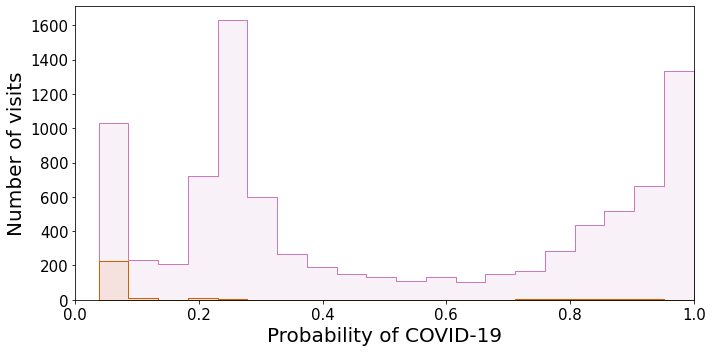

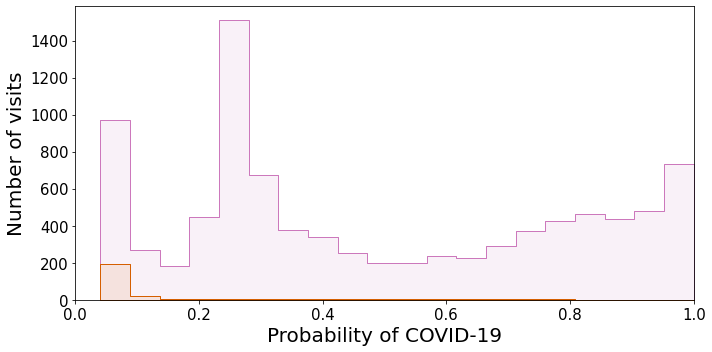

In [27]:
data_plot_training = pd.DataFrame([['training_cases', visit_probability[i]] 
                          for i in negative_training+positive_training if datetime_matrix[i][16]==1] +
                         [['training_non_cases', visit_probability[i]] 
                          for i in negative_training+positive_training if datetime_matrix[i][16]==0] , 
                         columns=['set', 'prob'])

data_plot_eval = pd.DataFrame([['eval_cases', visit_probability[i]] 
                          for i in negative_eval+positive_eval if datetime_matrix[i][16]==1] +
                         [['eval_non_cases', visit_probability[i]] 
                          for i in negative_eval+positive_eval if datetime_matrix[i][16]==0] , 
                         columns=['set', 'prob'])                         


plt.figure(figsize=(10, 5))
sns.histplot(data=data_plot_training, x='prob', bins=20,  hue='set', palette=colors[3:], legend=False,
             alpha=0.1, element='step')

plt.xlim(0,1)
plt.ylabel('Number of visits', size=20)
plt.xlabel('Probability of COVID-19', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.tight_layout()
plt.savefig('figure_3_f_training_set_june2021.pdf')
plt.show()


plt.figure(figsize=(10, 5))
sns.histplot(data=data_plot_eval, x='prob', bins=20,  hue='set', palette=colors[3:], legend=False,
             alpha=0.1, element='step')

plt.xlim(0,1)
plt.ylabel('Number of visits', size=20)
plt.xlabel('Probability of COVID-19', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.tight_layout()
plt.savefig('figure_3_f_eval_set_june2021.pdf')
plt.show()






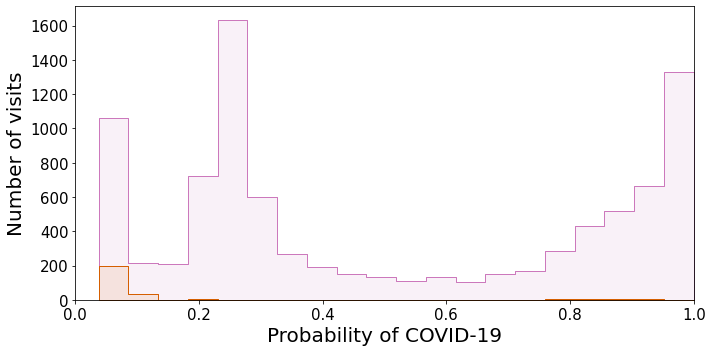

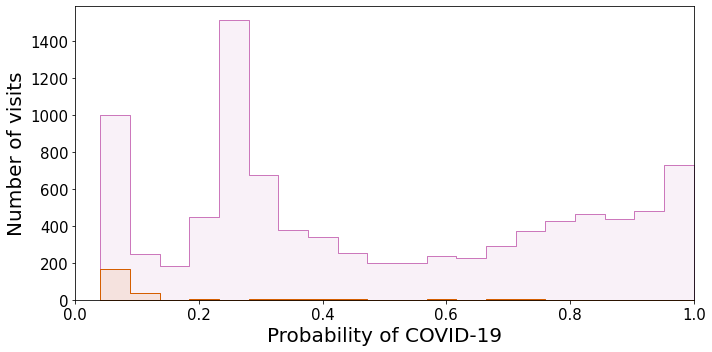

In [28]:
data_plot_training = pd.DataFrame([['training_cases', visit_probability[i]] 
                          for i in negative_training+positive_training if datetime_matrix[i][17]==1] +
                         [['training_non_cases', visit_probability[i]] 
                          for i in negative_training+positive_training if datetime_matrix[i][17]==0] , 
                         columns=['set', 'prob'])

data_plot_eval = pd.DataFrame([['eval_cases', visit_probability[i]] 
                          for i in negative_eval+positive_eval if datetime_matrix[i][17]==1] +
                         [['eval_non_cases', visit_probability[i]] 
                          for i in negative_eval+positive_eval if datetime_matrix[i][17]==0] , 
                         columns=['set', 'prob'])                         


plt.figure(figsize=(10, 5))
sns.histplot(data=data_plot_training, x='prob', bins=20,  hue='set', palette=colors[3:], legend=False,
             alpha=0.1, element='step')

plt.xlim(0,1)
plt.ylabel('Number of visits', size=20)
plt.xlabel('Probability of COVID-19', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.tight_layout()
plt.savefig('figure_3_g_training_set_july2021.pdf')
plt.show()


plt.figure(figsize=(10, 5))
sns.histplot(data=data_plot_eval, x='prob', bins=20,  hue='set', palette=colors[3:], legend=False,
             alpha=0.1, element='step')

plt.xlim(0,1)
plt.ylabel('Number of visits', size=20)
plt.xlabel('Probability of COVID-19', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.tight_layout()
plt.savefig('figure_3_g_eval_set_july2021.pdf')
plt.show()







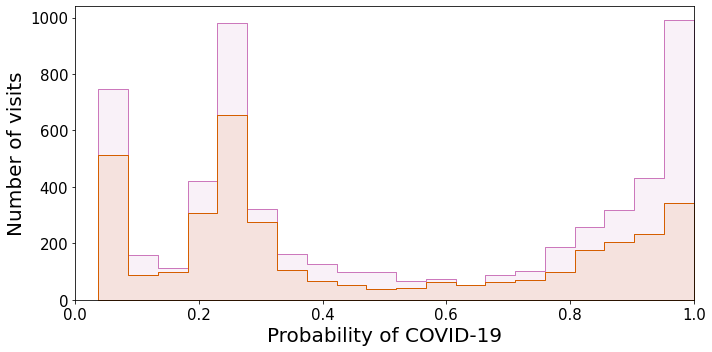

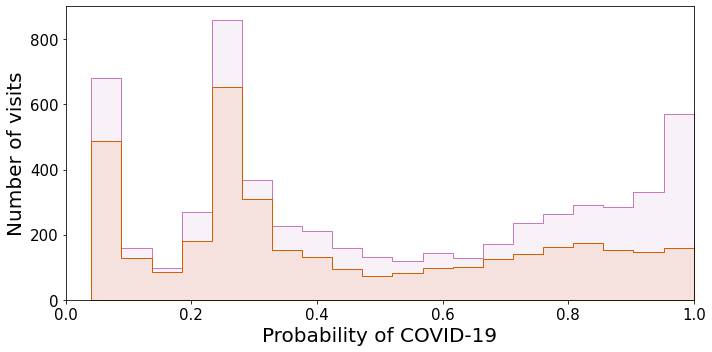

In [29]:
data_plot_training = pd.DataFrame([['training_cases', visit_probability[i]] 
                          for i in negative_training+positive_training if demographics_matrix[i][demographics_variables.index('WHITE')]==1] +
                         [['training_non_cases', visit_probability[i]] 
                          for i in negative_training+positive_training if demographics_matrix[i][demographics_variables.index('WHITE')]==0] , 
                         columns=['set', 'prob'])

data_plot_eval = pd.DataFrame([['eval_cases', visit_probability[i]] 
                          for i in negative_eval+positive_eval if demographics_matrix[i][demographics_variables.index('WHITE')]==1] +
                         [['eval_non_cases', visit_probability[i]] 
                          for i in negative_eval+positive_eval if demographics_matrix[i][demographics_variables.index('WHITE')]==0] , 
                         columns=['set', 'prob'])                         


plt.figure(figsize=(10, 5))
sns.histplot(data=data_plot_training, x='prob', bins=20,  hue='set', palette=colors[3:], legend=False,
             alpha=0.1, element='step')

plt.xlim(0,1)
plt.ylabel('Number of visits', size=20)
plt.xlabel('Probability of COVID-19', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.tight_layout()
plt.savefig('figure_3_h_training_set_white.pdf')
plt.show()


plt.figure(figsize=(10, 5))
sns.histplot(data=data_plot_eval, x='prob', bins=20,  hue='set', palette=colors[3:], legend=False,
             alpha=0.1, element='step')

plt.xlim(0,1)
plt.ylabel('Number of visits', size=20)
plt.xlabel('Probability of COVID-19', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.tight_layout()
plt.savefig('figure_3_h_eval_set_white.pdf')
plt.show()





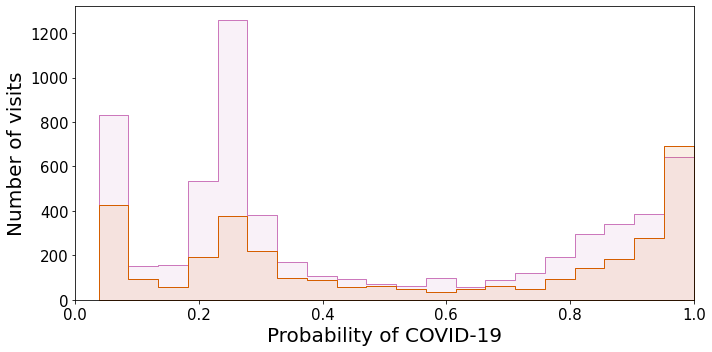

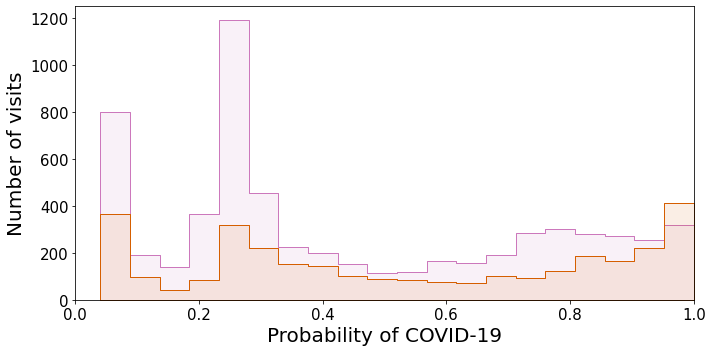

In [30]:
data_plot_training = pd.DataFrame([['training_cases', visit_probability[i]] 
                          for i in negative_training+positive_training if demographics_matrix[i][demographics_variables.index('HISPANIC OR LATINO OR SPANISH ORIGIN')]==1] +
                         [['training_non_cases', visit_probability[i]] 
                          for i in negative_training+positive_training if demographics_matrix[i][demographics_variables.index('HISPANIC OR LATINO OR SPANISH ORIGIN')]==0] , 
                         columns=['set', 'prob'])

data_plot_eval = pd.DataFrame([['eval_cases', visit_probability[i]] 
                          for i in negative_eval+positive_eval if demographics_matrix[i][demographics_variables.index('HISPANIC OR LATINO OR SPANISH ORIGIN')]==1] +
                         [['eval_non_cases', visit_probability[i]] 
                          for i in negative_eval+positive_eval if demographics_matrix[i][demographics_variables.index('HISPANIC OR LATINO OR SPANISH ORIGIN')]==0] , 
                         columns=['set', 'prob'])                         


plt.figure(figsize=(10, 5))
sns.histplot(data=data_plot_training, x='prob', bins=20,  hue='set', palette=colors[3:], legend=False,
             alpha=0.1, element='step')

plt.xlim(0,1)
plt.ylabel('Number of visits', size=20)
plt.xlabel('Probability of COVID-19', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.tight_layout()
plt.savefig('figure_3_i_training_set_hispanic.pdf')
plt.show()


plt.figure(figsize=(10, 5))
sns.histplot(data=data_plot_eval, x='prob', bins=20,  hue='set', palette=colors[3:], legend=False,
             alpha=0.1, element='step')

plt.xlim(0,1)
plt.ylabel('Number of visits', size=20)
plt.xlabel('Probability of COVID-19', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.tight_layout()
plt.savefig('figure_3_i_eval_set_hispanic.pdf')
plt.show()






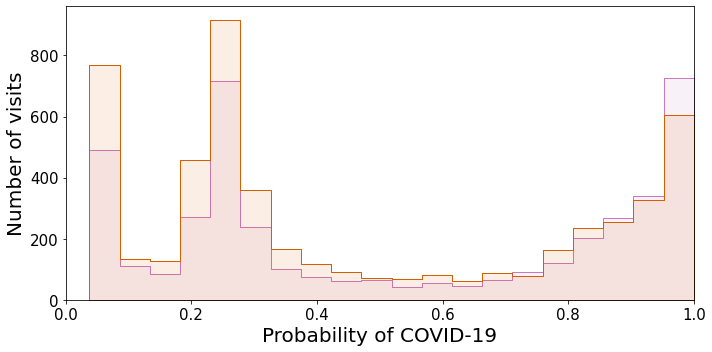

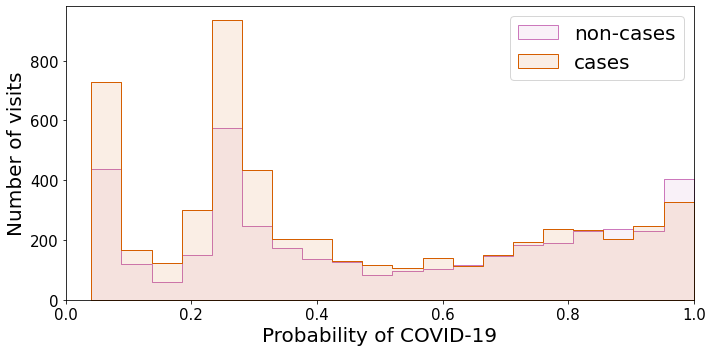

In [33]:
data_plot_training = pd.DataFrame([['training_cases', visit_probability[i]] 
                          for i in negative_training+positive_training if demographics_matrix[i][demographics_variables.index('sex_1')]==1] +
                         [['training_non_cases', visit_probability[i]] 
                          for i in negative_training+positive_training if demographics_matrix[i][demographics_variables.index('sex_1')]==0] , 
                         columns=['set', 'prob'])

data_plot_eval = pd.DataFrame([['eval_cases', visit_probability[i]] 
                          for i in negative_eval+positive_eval if demographics_matrix[i][demographics_variables.index('sex_1')]==1] +
                         [['eval_non_cases', visit_probability[i]] 
                          for i in negative_eval+positive_eval if demographics_matrix[i][demographics_variables.index('sex_1')]==0] , 
                         columns=['set', 'prob'])                         


plt.figure(figsize=(10, 5))
sns.histplot(data=data_plot_training, x='prob', bins=20,  hue='set', palette=colors[3:], legend=False,
             alpha=0.1, element='step')

plt.xlim(0,1)
plt.ylabel('Number of visits', size=20)
plt.xlabel('Probability of COVID-19', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.tight_layout()
plt.savefig('figure_3_j_training_set_female.pdf')
plt.show()


plt.figure(figsize=(10, 5))
sns.histplot(data=data_plot_eval, x='prob', bins=20,  hue='set', palette=colors[3:], legend=False,
             alpha=0.1, element='step')

plt.xlim(0,1)
plt.ylabel('Number of visits', size=20)
plt.xlabel('Probability of COVID-19', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.legend(['non-cases', 'cases'], prop={'size':20})
plt.tight_layout()
plt.savefig('figure_3_j_eval_set_female.pdf')
plt.show()




